**Информация о фильмах и шоу на Netflix:** название, год выпуска, жанр, страна, продолжительность, оценка и т.д.

**Цели анализа:** Анализ популярности по странам, исследование жанров и выпусков по годам, анализ соотношений по рейтингу и продолжительности.

In [1]:
#импорт библиотек
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go


Подгрузим наш датасет и выведем информацию о нем

In [2]:
netflix_overall = pd.read_csv("netflix_titles.csv")
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Почистим датафрейм и удалим оттуда все нулевые значения

In [18]:
netflix_overall = netflix_overall.dropna()


Заметим, что для колонки date_added не задан тип datetime. Исправим это

In [20]:

netflix_overall['date_added'] = pd.to_datetime(netflix_overall['date_added'], format='%B %d, %Y')
netflix_overall.dtypes

C:\Users\vikul\AppData\Local\Temp\ipykernel_31496\3275387685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_overall['date_added'] = pd.to_datetime(netflix_overall['date_added'], format='%B %d, %Y')


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Построим бар-чарт и круговую диаграмму для визуализации топ-10 стран по количеству фильмов  и шоу

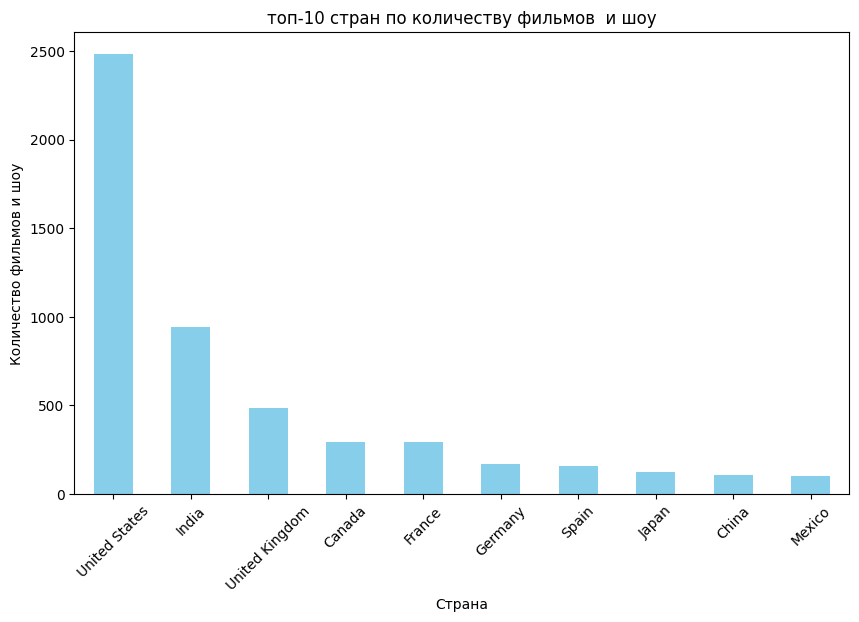

In [21]:
# Разделение стран, подсчет количества фильмов и шоу по странам
df_countries = netflix_overall['country'].dropna().str.split(', ').explode()
top_10_countries = df_countries.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title("топ-10 стран по количеству фильмов  и шоу")
plt.xlabel("Страна")
plt.ylabel("Количество фильмов и шоу")
plt.xticks(rotation=45)
plt.show()

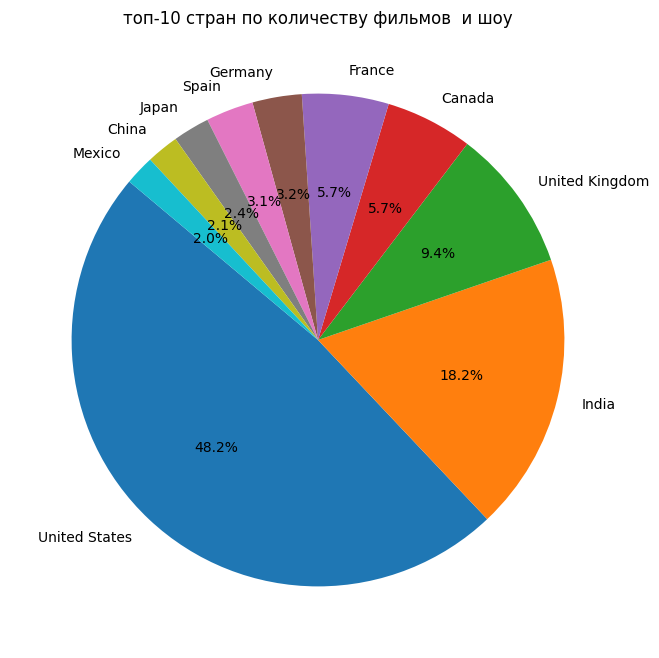

In [22]:
plt.figure(figsize=(8, 8))
top_10_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title("топ-10 стран по количеству фильмов  и шоу")
plt.ylabel('')
plt.show()

Разделяем таблицу на две: таблицу с сериалами и таблицу с фильмами

In [23]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

Построим диаграмму, которая покажет, разность в количестве фильмов и сериалов

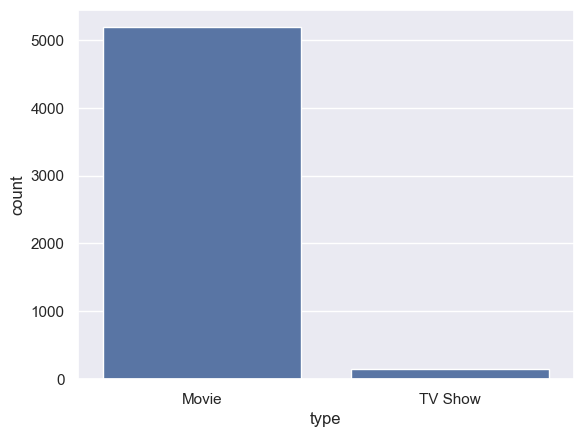

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall)

Заметим, что количество фильмов больше количества сериалов

**Исследование жанров**

Разделим жанры на отдельные категории и создадим новый столбец для подсчёта жанров.

In [25]:
df_genres = netflix_overall['listed_in'].dropna().str.split(', ').explode()
df_genres

7                         Dramas
7             Independent Movies
7           International Movies
8               British TV Shows
8                     Reality TV
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 11847, dtype: object

Построим горизонтальный бар-чарт, чтобы показать распределение фильмов и шоу по жанрам

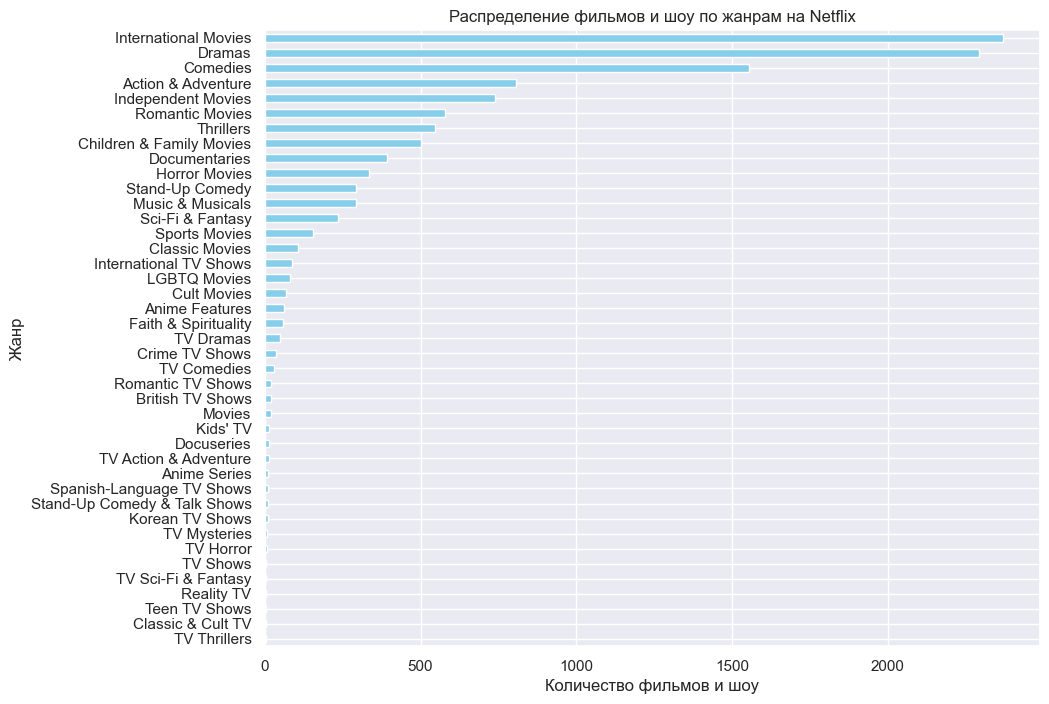

In [26]:
# Подсчет количества фильмов и шоу для каждого жанра
genre_counts = df_genres.value_counts()

# Построение горизонтального бар-чарта
plt.figure(figsize=(10, 8))
genre_counts.plot(kind='barh', color='skyblue')
plt.title("Распределение фильмов и шоу по жанрам на Netflix")
plt.xlabel("Количество фильмов и шоу")
plt.ylabel("Жанр")
plt.gca().invert_yaxis()
plt.show()

Над некоторыми фильмами работало несколько стран, поэтому проходимся по странам, чтобы мы смогли получить каждую страну отдельно

In [43]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j]+=1
        else:
            countries_mov[j]=1
countries_mov
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
countries_fin = countries_fin[:10]
countries_fin


[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

Анализ продолжительности фильмов

In [44]:
netflix_movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

Видим, что продолжительность фильмов измеряется в минутах. Делаем замену минут на пустоту, чтобы в дальнейшем отрисовать гистограмму

In [29]:
netflix_movies = netflix_movies[['duration']]
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
print(netflix_movies['duration'])


7       125
9       104
12      127
24      166
27      103
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5185, dtype: int64


Выводим график распределения частоты длительности фильмов

<Axes: xlabel='duration', ylabel='Density'>

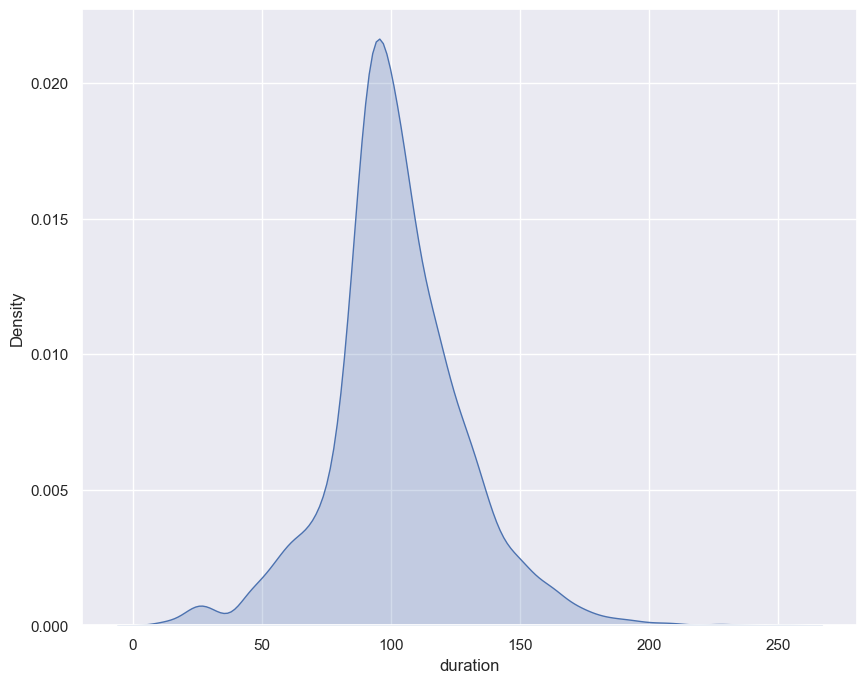

In [30]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
sns.kdeplot(data=netflix_movies['duration'], fill=True)


Вычислим конкретные статистические показатели

In [34]:
# Расчет статистических показателей
mean_duration = netflix_movies['duration'].mean()
median_duration = netflix_movies['duration'].median()
min_duration = netflix_movies['duration'].min()
max_duration = netflix_movies['duration'].max()

print(f"Средняя продолжительность: {mean_duration:.2f} минут")
print(f"Медиана продолжительности: {median_duration} минут")
print(f"Минимальная продолжительность: {min_duration} минут")
print(f"Максимальная продолжительность: {max_duration} минут")

Средняя продолжительность: 102.70 минут
Медиана продолжительности: 101.0 минут
Минимальная продолжительность: 8.0 минут
Максимальная продолжительность: 253.0 минут


**Исследование возрастного рейтинга**

Проанализируем данные по рейтингу и построим бар-чарт, чтобы визуализировать частоту встречаемости каждого типа рейтинга

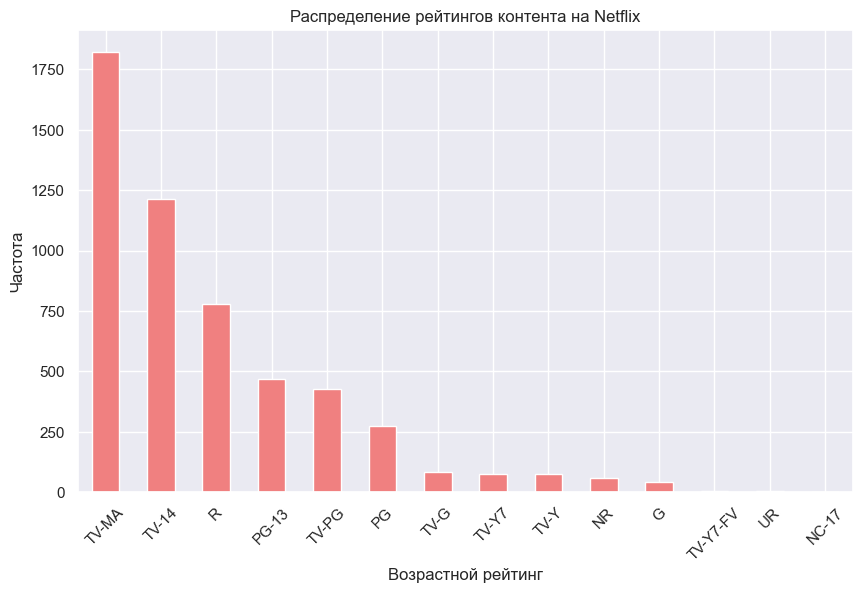

In [31]:
# Подсчет количества каждого типа рейтинга
rating_counts = netflix_overall['rating'].value_counts()

# Построение бар-чарта
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='lightcoral')
plt.title("Распределение рейтингов контента на Netflix")
plt.xlabel("Возрастной рейтинг")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

Заметим, что большее количество контента выпускается для категории 18+

**Анализ соотношений между рейтингом и продолжительностью**

Построим boxplot или violin plot для анализа распределения продолжительности по типам рейтингов

C:\Users\vikul\AppData\Local\Temp\ipykernel_31496\3166936690.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




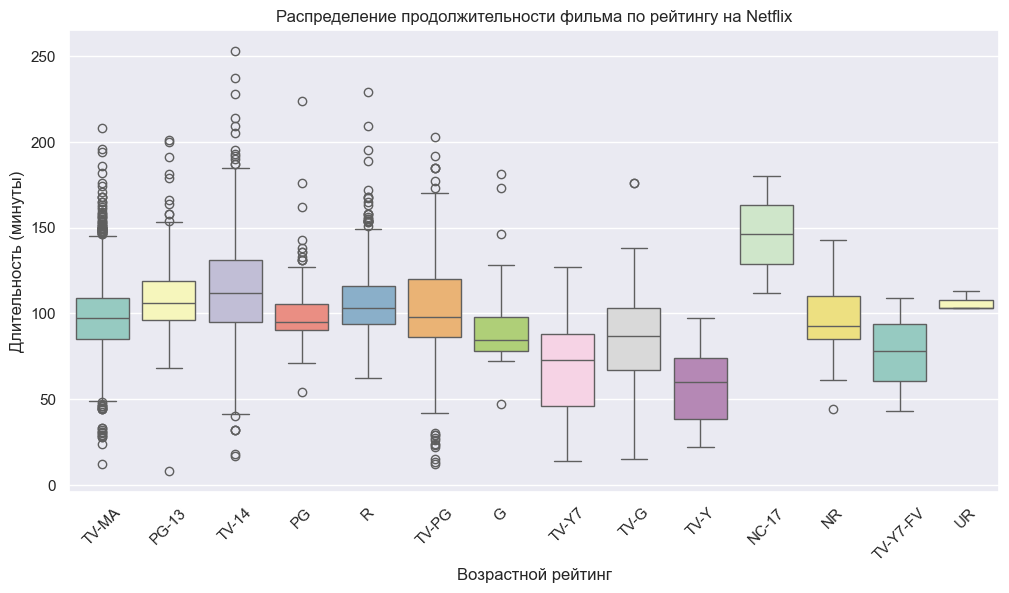

C:\Users\vikul\AppData\Local\Temp\ipykernel_31496\3166936690.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




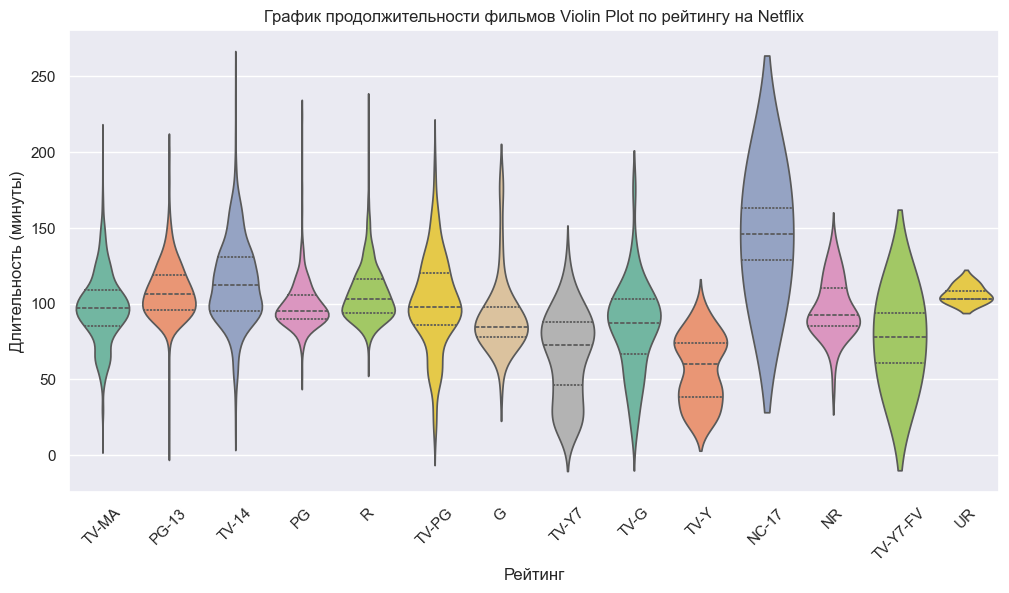

In [37]:
# Построение boxplot для анализа распределения продолжительности по типам рейтингов
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=netflix_movies, palette="Set3")
plt.title("Распределение продолжительности фильма по рейтингу на Netflix")
plt.xlabel("Возрастной рейтинг")
plt.ylabel("Длительность (минуты)")
plt.xticks(rotation=45)
plt.show()

# Построение violin plot для более детализированного анализа распределения
plt.figure(figsize=(12, 6))
sns.violinplot(x='rating', y='duration', data=netflix_movies, palette="Set2", inner="quartile")
plt.title("График продолжительности фильмов Violin Plot по рейтингу на Netflix")
plt.xlabel("Рейтинг")
plt.ylabel("Длительность (минуты)")
plt.xticks(rotation=45)
plt.show()